In [7]:
import numpy as np
import matplotlib.pyplot as plt
import sys

%matplotlib inline

plt.rcParams['font.size'] = 20
plt.rcParams['axes.linewidth'] = 2

sys.path.insert(0, "./")
from ipynb.fs.full.DMFT_tools import Hamiltonian, get_Bandstructure
from ipynb.fs.full.DMFT_tools import w2dyn, plot_object, S_iw_adjust, cut_matsubara
from ipynb.fs.full.DMFT_tools import real_to_bloch, get_Hk, export_bloch_to_w2dyn

In [8]:
bands_dft = np.genfromtxt( "./NiO.bands.dat.gnu" ) ## Path to DFT bands file
bands_wann = np.genfromtxt( "./NiO_band.dat" ) ## Path to Wannier90 bands file
Efermi_dft = 15.0013 ## Fermi energy in eV (for plotting)
a_lattice = 7.85108879 ## Lattice parameter (celldm(1)) in Bohr
bohr_to_angstrom = 0.529177 ## Conversion factor 
bands_dft[:,1] = bands_dft[:,1] - Efermi_dft ## Set Fermi energy to zero
bands_wann[:,1] = bands_wann[:,1] - Efermi_dft

In [9]:
##
prefix = "NiO"
num_points = 30  ## Number of points between each special point
path = np.asarray([[0.375,0.750,0.375],
                  [0.000,0.000,0.000],
                  [0.000,0.500,0.500],
                  [0.250,0.750,0.500],
                  [0.500,0.500,0.500],
                  [0.000,0.000,0.000]])
labels = ["K", "X", "G", "W", "L", "G"]

In [10]:
## 1. QE convention: energies are written in eV and xk in units 2\pi/a, with a in Bohr
## 2. Wannier90 convention: energies are written in eV and xk in units of 1/a, with a in Angstrom
## 3. get_Bandstructure convention: energies are written in eV and xk in units of reciprocal lattice vectors 
rescale_wann = 2*np.pi/(a_lattice*bohr_to_angstrom)
## PROBLEM: equispaced points in conventions 1. and 2. match, but do not match with convention 3. 
## I think it is a scale problem due to the different lengths of the vectors used as units in convention 3
## but I had not taken the time to fix it. 

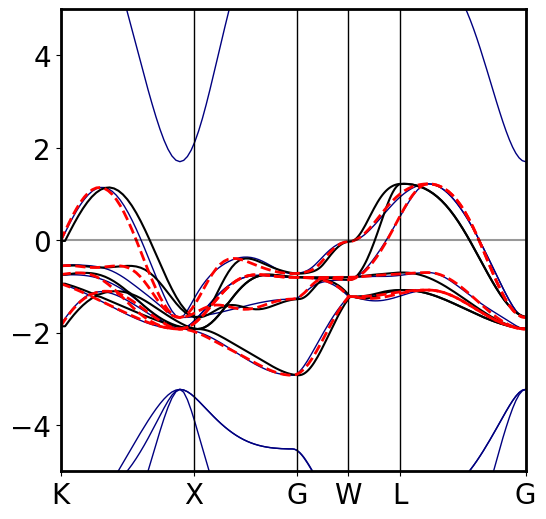

In [5]:
H = Hamiltonian(3)
filein = prefix + "_hr.dat"
H.read_w90_hamiltonian_hr(filein)

fig, axs, bands, x = get_Bandstructure(H, path, labels, num_points, -5, 5, Efermi_dft)
rescale_dft = x[-1]/bands_dft[-1,0]
lw = 2
num_bands = 32
num_pts = 5*30+1
num_pts_wann = 117

for k in range(num_bands):
    axs.plot(bands_wann[k*num_pts_wann:k*num_pts_wann+num_pts_wann,0]/rescale_wann*rescale_dft, bands_wann[k*num_pts_wann:k*num_pts_wann+num_pts_wann,1], 
                linewidth=lw, color="red", linestyle="--")
    if k > 0:
        axs.plot(bands_dft[k*num_pts:k*num_pts+num_pts,0]*rescale_dft, bands_dft[k*num_pts:k*num_pts+num_pts,1], 
                color="navy", zorder=-1, linewidth=1)
        
        
axs.axhline(0, color="black", alpha=0.40)

In [11]:
#print(H.H_r)
fileout = prefix + "_hk.dat"
export_bloch_to_w2dyn(fileout, H, n_kx = 24, n_ky = 24, n_kz = 24)